## Preprocessing

In [1]:

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf



In [2]:
##I had to use Colab, so this is to upload csv from Resources
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [5]:
#  Import and read the charity_data.csv.
import pandas as pd 
app_df = pd.read_csv("charity_data.csv")
app_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
app_df = app_df.drop( labels=['EIN','NAME'], axis=1)
app_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Determine the number of unique values in each column.
app_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
app_count = app_df["APPLICATION_TYPE"].value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

app_types_to_replace = list(app_count[app_count < 500].index)
# Replace in dataframe
for app in app_types_to_replace:
    app_df['APPLICATION_TYPE'] = app_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
app_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
class_count = app_df["CLASSIFICATION"].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2500        1
C4500        1
C1370        1
C1283        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

class_to_replace = list(class_count[class_count< 2000].index)

# Replace in dataframe
for cls in class_to_replace:
    app_df['CLASSIFICATION'] = app_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
app_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
app_df = pd.get_dummies(app_df)
app_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [13]:
# Split our preprocessed data into our features and target arrays
y= app_df['IS_SUCCESSFUL'].values.reshape(-1,1)
X= app_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [16]:
#First attempt  
#Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
hidden_nodes_1 = 80
hidden_nodes_2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_1, input_dim=num_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3360      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5769 - accuracy: 0.7168
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5602 - accuracy: 0.7264
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5568 - accuracy: 0.7281
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7278
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7285
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7292
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.7303
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7297
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5508 - accuracy: 0.7306
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5508 - accura

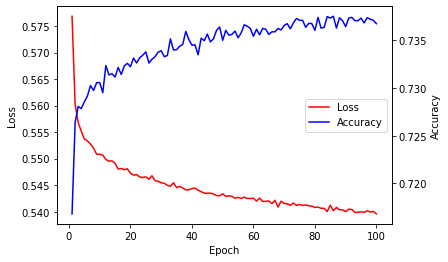

In [ ]:

# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history,
                          index=range(1, len(fit_model.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5622 - accuracy: 0.7284
Loss: 0.5622082948684692, Accuracy: 0.728396475315094


In [17]:
#Second attempt -add another hidden layer
#Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
hidden_nodes_1 = 80
hidden_nodes_2 = 30
hidden_nodes_3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_1, input_dim=num_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_2, activation='relu'))

#Third Hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_3, activation = 'relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                3360      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_8 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 16        
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Train the model
fit_model_2 = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5383 - accuracy: 0.7379
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.7378
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5381 - accuracy: 0.7379
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5384 - accuracy: 0.7380
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.7382
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5384 - accuracy: 0.7373
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5382 - accuracy: 0.7377
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5378 - accuracy: 0.7378
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.7381
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5384 - accura

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f6501d05830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


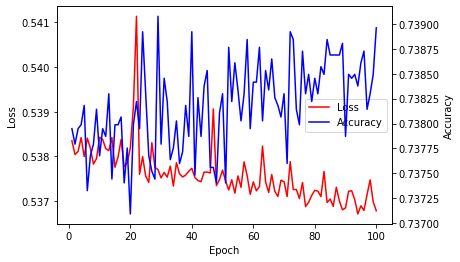

In [24]:
# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_2_df = pd.DataFrame(fit_model_2.history,
                          index=range(1, len(fit_model_2.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_2_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_2_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5748 - accuracy: 0.7273
Loss: 0.5747761726379395, Accuracy: 0.7273469567298889


In [26]:
#Third attempt - more epochs  
#Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
hidden_nodes_1 = 80
hidden_nodes_2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_1, input_dim=num_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 80)                3360      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 31        
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Train the model
fit_model_3 = nn.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5752 - accuracy: 0.7176
Epoch 2/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5614 - accuracy: 0.7262
Epoch 3/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5584 - accuracy: 0.7255
Epoch 4/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5559 - accuracy: 0.7285
Epoch 5/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7292
Epoch 6/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7290
Epoch 7/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5535 - accuracy: 0.7302
Epoch 8/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7295
Epoch 9/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.7299
Epoch 10/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5517 - accura

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f6501d05830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


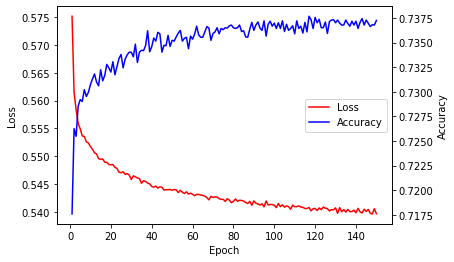

In [29]:
# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_3_df = pd.DataFrame(fit_model_3.history,
                          index=range(1, len(fit_model_3.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_3_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_3_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5652 - accuracy: 0.7275
Loss: 0.5652005076408386, Accuracy: 0.7274635434150696
